In [6]:
import pandas as pd
from termcolor import colored
import tensorflow as tf
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        
import csv
import keras
import seaborn as sns

from keras.models import Sequential  
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten # some layers omitted
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [7]:
# Import experimental data
exp_data = 'train.csv'
raw_dataset = pd.read_csv(exp_data,
                          na_values='?', comment=',',
                          sep=',', header=0) # header is row 0
# print(raw_dataset.head())
print(len(raw_dataset)) # print number of rows
print(len(raw_dataset.columns)) # print number of columns

3751
1777


In [8]:
# Split features (x_train) and variable (y_train)
x_data, y_data = raw_dataset.filter(regex='^D'), raw_dataset.filter(regex='Activity')

# Check split is correct
# print(x_data.head)
# print(y_data.head)

# Calculate min and max of x-values: min and max is 0 to 1, which means do not need to normalize
print(x_data.min().min()) # minimum of entire dataframe regardless of row and column
print(x_data.max().max()) # maximum of entire dataframe regardless of row and column

# Calculate min and max of y-values: min and max is 0 to 1, which means do not need to normalize
print(y_data.min())
print(y_data.max())

0.0
1.0
Activity    0
dtype: int64
Activity    1
dtype: int64


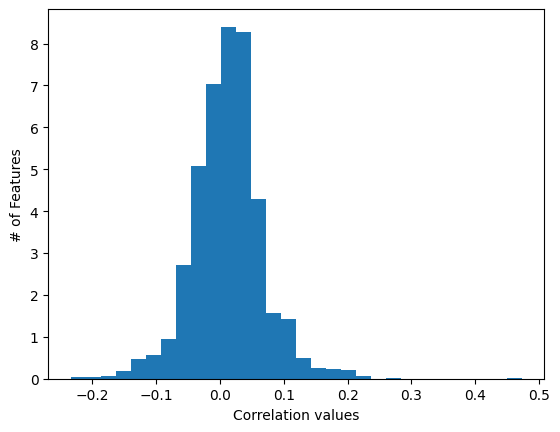

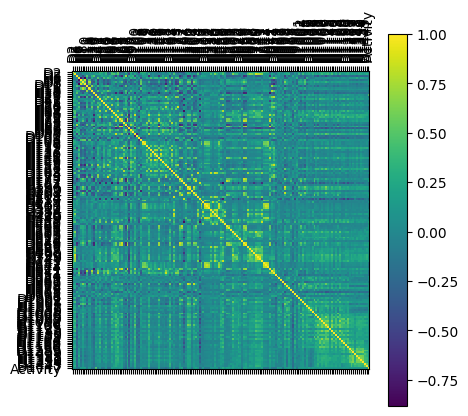

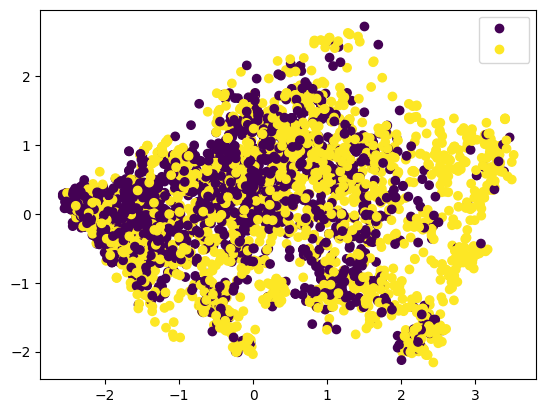

In [4]:
# Identify which features are correlated with activity
# 1. Calculate correlation for each Feature to Variable
# 2. Then plot histogram of correlation values
# Conclusion: D27 has the highest correlation to Activity, with a correlation value of 0.47

plot_input = [] # list to store correlation values
correlated_features = [] # list to store slightly correlated features

# For each Feature (column) in x_data, calculate correlation to Variable ("Activity")
for col in x_data.columns: # col is the column name in x_data

    # Calculate correlation between Activity (y-value) and Feature (x-value)
    corr_res = raw_dataset['Activity'].corr(raw_dataset[col])

    # Append correlation value to plot_input vector
    plot_input.append(corr_res)

    # If correlation is less than -0.2 or greater than 0.2, print Feature name and correlation value
    if corr_res >= 0.1 or corr_res <= -0.1:
        # print(col, corr_res)
        correlated_features.append(col) # save slightly correlated features to list
    
# Histogram of correlation values
plt.hist(plot_input, density=True, bins=30)  # density=False would make counts
plt.ylabel('# of Features')
plt.xlabel('Correlation values')

# Heatmap of correlation values
heatmap_col = correlated_features.copy() # copy correlated_features object
heatmap_col += ['Activity'] # append "Activity" string to list of columns
heatmap_input = raw_dataset[heatmap_col] # obtain columns representing features of interest and Activity 
plt.matshow(heatmap_input.corr())
plt.xticks(np.arange(len(heatmap_col)), heatmap_input.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_col)), heatmap_input.columns, rotation=0)
plt.colorbar()
plt.show()

# PCA
pca_labels = list(map(str, raw_dataset['Activity']))
pca = PCA()
Xt = pca.fit_transform(raw_dataset[correlated_features])
plot = plt.scatter(Xt[:,0], Xt[:,1], c=raw_dataset['Activity'])
plt.legend(handles=plot.legend_elements()[0])
plt.show()

In [10]:
# Linear regression
scores = []
coefs = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_data[correlated_features], y_data, test_size=0.1, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(x_train, y_train)
    scores.append(lineReg.score(x_test, y_test))
print('Linear Regression')
print(np.mean(scores))

# Ridge regression
scores = []
coefs = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_data[correlated_features], y_data, test_size=0.1, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(x_train, y_train)
    scores.append(lineReg.score(x_test, y_test))
print('\nRidge Regression')
print(np.mean(scores))

Linear Regression
0.31223410822292375

Ridge Regression
0.3155902822528594


In [ ]:
# Try modeling with just D27 feature

# Linear regression
scores = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_data['D27'], y_data, test_size=0.2, shuffle= True)

    # Convert 2D to 1D array (necessary for regression)
    x_train = np.array(x_train) # convert pandas series to numpy array
    x_test = np.array(x_test) 
    x_train = x_train.reshape(-1, 1) # convert to 1D array
    x_test = x_test.reshape(-1, 1)

    lineReg = LinearRegression()
    lineReg.fit(x_train, y_train)
    scores.append(lineReg.score(x_test, y_test))
print('Linear Regression')
print(np.mean(scores))

# Ridge regression
scores = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x_data['D27'], y_data, test_size=0.2, shuffle= True)

    # Convert 2D to 1D array (necessary for regression)
    x_train = np.array(x_train) # convert pandas series to numpy array
    x_test = np.array(x_test) 
    x_train = x_train.reshape(-1, 1) # convert to 1D array
    x_test = x_test.reshape(-1, 1)
    
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(x_train, y_train)
    scores.append(lineReg.score(x_test, y_test))
print('\nRidge Regression')
print(np.mean(scores))